In [ ]:
import sys
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from gaussianKernel import gaussianKernel
from pylab import scatter, show, legend, xlabel, ylabel, contour, title, plot
from numpy import *

import warnings
warnings.filterwarnings('ignore')

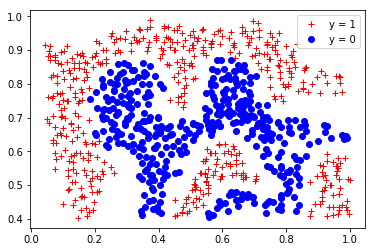

In [16]:
# Load the dataset
# The first two columns contains the exam scores and the third column contains the label.
data = loadtxt('data2.txt', delimiter=',')

X = data[:, 0:2] 
y = data[:, 2]

# # Plot data 
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'r+', label="c1")
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'bo', label="c2")
plt.legend(['y = 1', 'y = 0'],numpoints=1)
plt.show()

ETA: 100%

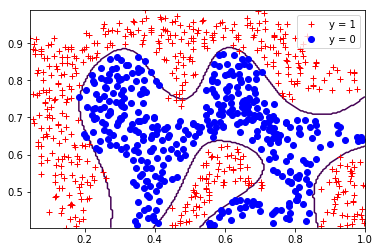

Train Accuracy: 98.493627


In [17]:
C = 100  # SVM regularization parameter
sigma = 0.2 # Gaussian kernel variance

# We calculate the Gaussian kernel between the instances/samples
K = gaussianKernel(X,X,sigma)

# We create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
svc = SVC(C = C, kernel="precomputed")
svc.fit(K,y)

# Plot the decision boundary
u = linspace(min(X[:, 0]),max(X[:, 0]), 200)
v = linspace(min(X[:, 1]),max(X[:, 1]), 200)
z = zeros(shape=(len(u), len(v)))

END = len(u)*len(v)
CUR = 0
ETA = CUR/END

for i in range(len(u)):
    for j in range(len(v)):
        CUR+=1
        z[i,j] = svc.predict(gaussianKernel(array([[u[i],v[j]]]),X,sigma))
        ETA = CUR/END
        sys.stdout.write("\rETA: {0:.0%}".format(ETA))
        sys.stdout.flush()

plot(X[:,0][y == 1], X[:,1][y == 1], 'r+', label="c1")
plot(X[:,0][y == 0], X[:,1][y == 0], 'bo', label="c2")
contour(u, v, z.T, [0])
legend(['y = 1', 'y = 0', 'Decision boundary'],numpoints=1)
show()

# Compute accuracy on the training set
p = svc.predict(K)
counter = 0
for i in range(y.size):
    if p[i] == y[i]:
        counter += 1
print('Train Accuracy: %f' % (counter / float(y.size) * 100.0))